# Data Mining Lab Test
#### NAME: TEAN JIN HE
#### MATRIC ID: SD21063
#### SECTION: 02G

### Question 1

#### Step 1: Import related libraries and load the datasets

In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('Movies.csv')
movies

,Production Budget(M),Worldwide Gross Income (M),Genre
0,13,230,action
1,16,224,drama
2,15,221,thriller_suspense
3,14,202,adventure
4,16,198,adventure
...,...,...,...
95,37,16,adventure
96,32,19,action
97,31,17,action
98,26,16,western


#### Step 2: Provide comprehensive Exploratory Data Analysis (EDA). Summarise the findings and  solve the noise in the datasets.

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Production Budget(M)        100 non-null    int64 
 1   Worldwide Gross Income (M)  100 non-null    int64 
 2   Genre                       100 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [4]:
movies.describe()

,Production Budget(M),Worldwide Gross Income (M)
count,100.000000,100.000000
mean,43.560000,69.140000
std,66.327976,81.065009
min,1.000000,4.000000
25%,6.000000,12.000000
50%,12.000000,16.000000
75%,46.500000,167.000000
max,230.000000,230.000000


In [5]:
movies.isna().sum()

Production Budget(M)          0
Worldwide Gross Income (M)    0
Genre                         0
dtype: int64

#### Step 3: Convert the string attribute to numerical form.

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
movies['Genre'] = le.fit_transform(movies['Genre']).astype(float)
movies.head()


,Production Budget(M),Worldwide Gross Income (M),Genre
0,13,230,0.0
1,16,224,2.0
2,15,221,4.0
3,14,202,1.0
4,16,198,1.0


In [7]:
X = movies.iloc[:, [0, 1]].values
X

array([[ 13, 230],
       [ 16, 224],
       [ 15, 221],
       [ 14, 202],
       [ 16, 198],
       [ 14, 180],
       [ 18, 178],
       [ 14, 176],
       [ 13, 176],
       [ 17, 175],
       [ 18, 175],
       [ 16, 172],
       [ 19, 167],
       [ 17, 165],
       [ 16, 155],
       [ 14, 230],
       [  8, 224],
       [  5, 221],
       [  2, 202],
       [  3, 198],
       [  6, 180],
       [  6, 178],
       [  2, 176],
       [  6, 176],
       [  4, 175],
       [  5, 175],
       [  3, 172],
       [  6, 167],
       [  6, 165],
       [  7, 155],
       [  3, 124],
       [  9, 124],
       [  8, 124],
       [  7, 123],
       [ 13,  12],
       [230,  16],
       [224,  15],
       [221,  14],
       [202,  16],
       [198,  14],
       [180,  18],
       [178,  14],
       [176,  13],
       [176,  17],
       [175,  18],
       [175,  16],
       [172,  19],
       [167,  17],
       [165,  16],
       [155,  14],
       [230,   6],
       [  8,   4],
       [  9,

#### Step 4: Create the dendrogram to find the optimal number of clusters. Explain your answer.

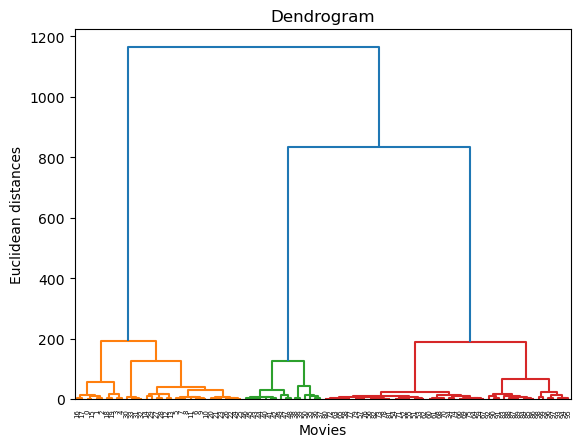

In [8]:
# Step 4: Create dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Movies')
plt.ylabel('Euclidean distances')
plt.show()


#### Step 5: Train the hierarchical clustering algorithm in the usecase. Explain the hyperparameter settings implemented for the model.

In [9]:
# Step 5: Train hierarchical clustering algorithm
# Use case Explain hyperparameter settings implemented in model
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(movies)
y_hc

D:\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

#### Step 6: Visualize the clusters involved and interpret them

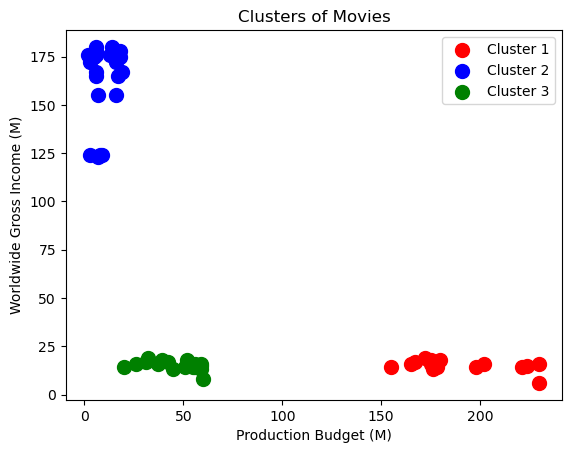

In [10]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# Repeat for other clusters with different conditions and colors
plt.title('Clusters of Movies')
plt.xlabel('Production Budget (M)')
plt.ylabel('Worldwide Gross Income (M)')
plt.legend()
plt.show()

1. Cluster 1 (High Profitability): These are the blue dots in the top left corner, representing movies with low production budgets but high worldwide gross incomes.
2. Cluster 2 (Moderate Profitability): Represented by red dots, these movies had high production budgets and moderate worldwide gross incomes.
3. Cluster 3 (Low Profitability): The green dots indicate movies with moderate production budgets but low worldwide gross incomes.

This analysis suggests that some movies can achieve high profitability without necessarily having large production budgets. Conversely, a high production budget does not guarantee high worldwide gross income. 

### QUESTION 2

#### Step 1: Import related libraries and load the order_data.csv dataset.

In [11]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [12]:
df = pd.read_csv('order_data.csv', names = ['Products'])
df.head()

,Products
0,toothpaste brush milk cereals honey bread butt...
1,milk cereals honey bread cheese razor gel shampoo
2,milk cereals honey cheese soap shampoo
3,honey bread butter cheese mouthwash toothpaste
4,cereals honey bread butter gel soap


In [13]:
df['Products'] = df['Products'].str.replace(' ', ', ')
df

,Products
0,"toothpaste, brush, milk, cereals, honey, bread..."
1,"milk, cereals, honey, bread, cheese, razor, ge..."
2,"milk, cereals, honey, cheese, soap, shampoo"
3,"honey, bread, butter, cheese, mouthwash, tooth..."
4,"cereals, honey, bread, butter, gel, soap"
5,"cheesse, yogurt, milk, cereals, honey, shampoo..."
6,"honey, bread, cheese, razor, butter, yogurt"
7,"honey, bread, cheese, butter, milk"
8,"cereals, butter, cookies, chips"
9,"cerals, cheese, yogurt, cookies, chips"


#### Step 2: Check the info for the dataset recorded. 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Products  20 non-null     object
dtypes: object(1)
memory usage: 292.0+ bytes


#### Step 3: Check the shape of the dataset.

In [15]:
df.shape

(20, 1)

#### Step 4: Convert Pandas DataFrame into a list of lists. 

In [16]:
data = list(df["Products"].apply(lambda x:x.split(",") ))
data

[['toothpaste',
  ' brush',
  ' milk',
  ' cereals',
  ' honey',
  ' bread',
  ' butter',
  ' cheese',
  ' yogurt'],
 ['milk',
  ' cereals',
  ' honey',
  ' bread',
  ' cheese',
  ' razor',
  ' gel',
  ' shampoo'],
 ['milk', ' cereals', ' honey', ' cheese', ' soap', ' shampoo'],
 ['honey', ' bread', ' butter', ' cheese', ' mouthwash', ' toothpaste'],
 ['cereals', ' honey', ' bread', ' butter', ' gel', ' soap'],
 ['cheesse', ' yogurt', ' milk', ' cereals', ' honey', ' shampoo', ' gel'],
 ['honey', ' bread', ' cheese', ' razor', ' butter', ' yogurt'],
 ['honey', ' bread', ' cheese', ' butter', ' milk'],
 ['cereals', ' butter', ' cookies', ' chips'],
 ['cerals', ' cheese', ' yogurt', ' cookies', ' chips'],
 ['toothpaste', ' brush', ' gel', ' shampoo', ' soap', ' cookies', ' chips'],
 ['toothpaste', ' brush', ' gel', ' razor', ' mouthwash', ' milk', ' cookies'],
 ['razor', ' shampoo', ' gel', ' soap', ' bread', ' butter'],
 ['brush',
  ' shampoo',
  ' gel',
  ' toothpaste',
  ' mouthwash',

#### Step 5: Transform the list with one-hot encoding. Explain the function.

In [17]:
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace(False,0)
df

,bread,brush,butter,cereals,cheese,chips,cookies,gel,honey,milk,...,cerals,cereals,cheesse,gel,honey,milk,mouthwash,razor,shampoo,toothpaste
0,True,True,True,True,True,0,0,0,True,True,...,0,0,0,0,0,0,0,0,0,True
1,True,0,0,True,True,0,0,True,True,0,...,0,0,0,0,0,True,0,0,0,0
2,0,0,0,True,True,0,0,0,True,0,...,0,0,0,0,0,True,0,0,0,0
3,True,0,True,0,True,0,0,0,0,0,...,0,0,0,0,True,0,0,0,0,0
4,True,0,True,0,0,0,0,True,True,0,...,0,True,0,0,0,0,0,0,0,0
5,0,0,0,True,0,0,0,True,True,True,...,0,0,True,0,0,0,0,0,0,0
6,True,0,True,0,True,0,0,0,0,0,...,0,0,0,0,True,0,0,0,0,0
7,True,0,True,0,True,0,0,0,0,True,...,0,0,0,0,True,0,0,0,0,0
8,0,0,True,0,0,True,True,0,0,0,...,0,True,0,0,0,0,0,0,0,0
9,0,0,0,0,True,True,True,0,0,0,...,True,0,0,0,0,0,0,0,0,0


#### Step 6: Build the Apriori model for the dataset. Set the minimum support value at 0.25, minimum confidence at 0.2, minimum lift at 2 and minimum length at 2.

In [18]:
#set a threshold value for the support value and calculate the support value.
df = apriori(df, min_support = 0.25, use_colnames = True, verbose = 1)
df

Processing 36 combinations | Sampling itemset size 3


D:\anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.55,( bread)
1,0.4,( butter)
2,0.3,( cereals)
3,0.5,( cheese)
4,0.3,( cookies)
5,0.45,( gel)
6,0.3,( honey)
7,0.35,( milk)
8,0.25,( mouthwash)
9,0.25,( razor)


In [19]:
df_ar = association_rules(df, metric="confidence", min_threshold=0.2)
df_ar = association_rules(df, metric="lift", min_threshold=2)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( cereals),( honey),0.3,0.3,0.25,0.833333,2.777778,0.16,4.2,0.914286
1,( honey),( cereals),0.3,0.3,0.25,0.833333,2.777778,0.16,4.2,0.914286


#### Step 7: Get the support, confidence and lift values for recommended antecedents and consequents transactions. Explain the results.

- Support: Both rules have a support of (0.25), indicating that the combination of cereals and honey appears together in 25% of all transactions.
- Confidence: The confidence of (0.833333) suggests a high likelihood (over 83%) that the consequent item is purchased when the antecedent is bought.
- Lift: A lift of (2.777778) indicates that the likelihood of purchasing cereals and honey together is nearly 2.8 times higher than the likelihood of purchasing them independently.
- Leverage: The leverage of (0.16) shows the proportion of additional transactions with cereals and honey together, above what would be expected if they were statistically independent.
- Conviction: A conviction of (4.2) implies that the consequent is 4.2 times more likely to be purchased when the antecedent is bought, compared to when it’s not.
- Zhang’s Metric: With a value of (0.914286), this metric indicates a strong positive correlation between the purchase of cereals and honey.

These results can be useful for retail stores to optimize product placement or for targeted marketing campaigns. The high values of confidence, lift, and other metrics suggest that when customers buy one of these items, they are very likely to buy the other. Hence, placing cereals and honey close together in a store or promoting them together in a campaign could potentially increase sales.

### Question 3

1) Grab a class’s elements from the URL below using BeatifulSoup.
https://en.wikipedia.org/wiki/Large_language_model

#### Step 1: Get the request for the URL link.

In [20]:
import requests
response = requests.get("https://en.wikipedia.org/wiki/Large_language_model")
response

<Response [200]>

#### Step 2: Create a soup from the request.

In [21]:
type(response)

requests.models.Response

In [22]:
import bs4
soup = bs4.BeautifulSoup(response.text,"lxml")
soup

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Large language model - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-widt

#### Step 3: Select the (“.toctext) for grabbing the elements from the URL.

In [23]:
soup.select(".toctext")

[]

#### Step 4: Print the element nicely.

In [24]:
for item in soup.select(".toctext"):
 print(item.text)

2) Figure 3 shows the price of the Mazda CX-8 in Mazda website. Crawl the price by 
inspecting the element for the price from the link below using lxml and BeautifulSoup.
https://mazda.com.my/vehicles/mazda-cx-8

In [25]:
res = requests.get("https://mazda.com.my/vehicles/mazda-cx-8")
soup = bs4.BeautifulSoup(res.text,'lxml')

In [26]:
#Extracting Readable Text from a BeautifulSoup Object
import requests
res = requests.get("https://mazda.com.my/vehicles/mazda-cx-8")
soup = bs4.BeautifulSoup(res.text,'lxml')
def encoding_check(r):
 return (r.encoding)
def decode_content(r,encoding):
 return (r.content.decode(encoding))
contents = decode_content(response,encoding_check(response))


In [27]:
from bs4 import BeautifulSoup
# Parse the HTML content of the page using BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [28]:
txt_dump=soup.text
txt_dump

"\n\n\n\n\n\n\n\nMazda CX-8\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nWe use cookies to enhance your experience. By continuing to visit this site you agree to our Personal Data Protection Act and Terms & Conditions\n\n\n\n\nGot It\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMazda Anshin\n\n\nTest Drive\n\n\nFind a Dealer\n\n\n\n\n\n\n\n\nDigital Showroom\n\nWhy Mazda\n\nOwners & Services\n\nNews & Events\n\nAbout Us\n\n\n\n\n\nDigital Showroom\n\n\n\r\n                                    Menu\r\n                                    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nTHE NEW\nMazda2\nHatch | Sedan\n\n\n\n\n\nMazda3\nSedan | Liftback\n\n\n\n\n\nMazda6\nSedan | Touring\n\n\n\n\n\nMazda MX-5 RF\nRF\n\n\n\n\n\nMazda CX-3\nSmall SUV\n\n\n\n\n\nThe New\nMazda CX-30\nSmall SUV\n\n\n\n\n\nMazda CX-5\nMedium SUV\n\n\n\n\n\nThe New\nMazda CX-8\nLarge SUV\n\n\n\n\n\nMazda CX-9\nLarge SUV\n\n\n\n\n\nAll-New \nMazda BT-50\nDouble Cab | Single Cab\n\n\n\n\n\nAll-

In [29]:
# Find the element that contains the price
# Assuming the price is within a <span> tag with a specific class or id
price_element = soup.find('p', class_='grade-select__details-price')  # Replace 'price-class' with the actual class or id

In [30]:
# Extract the text from the price element
price = price_element.text.strip()
price

'RM184,000'

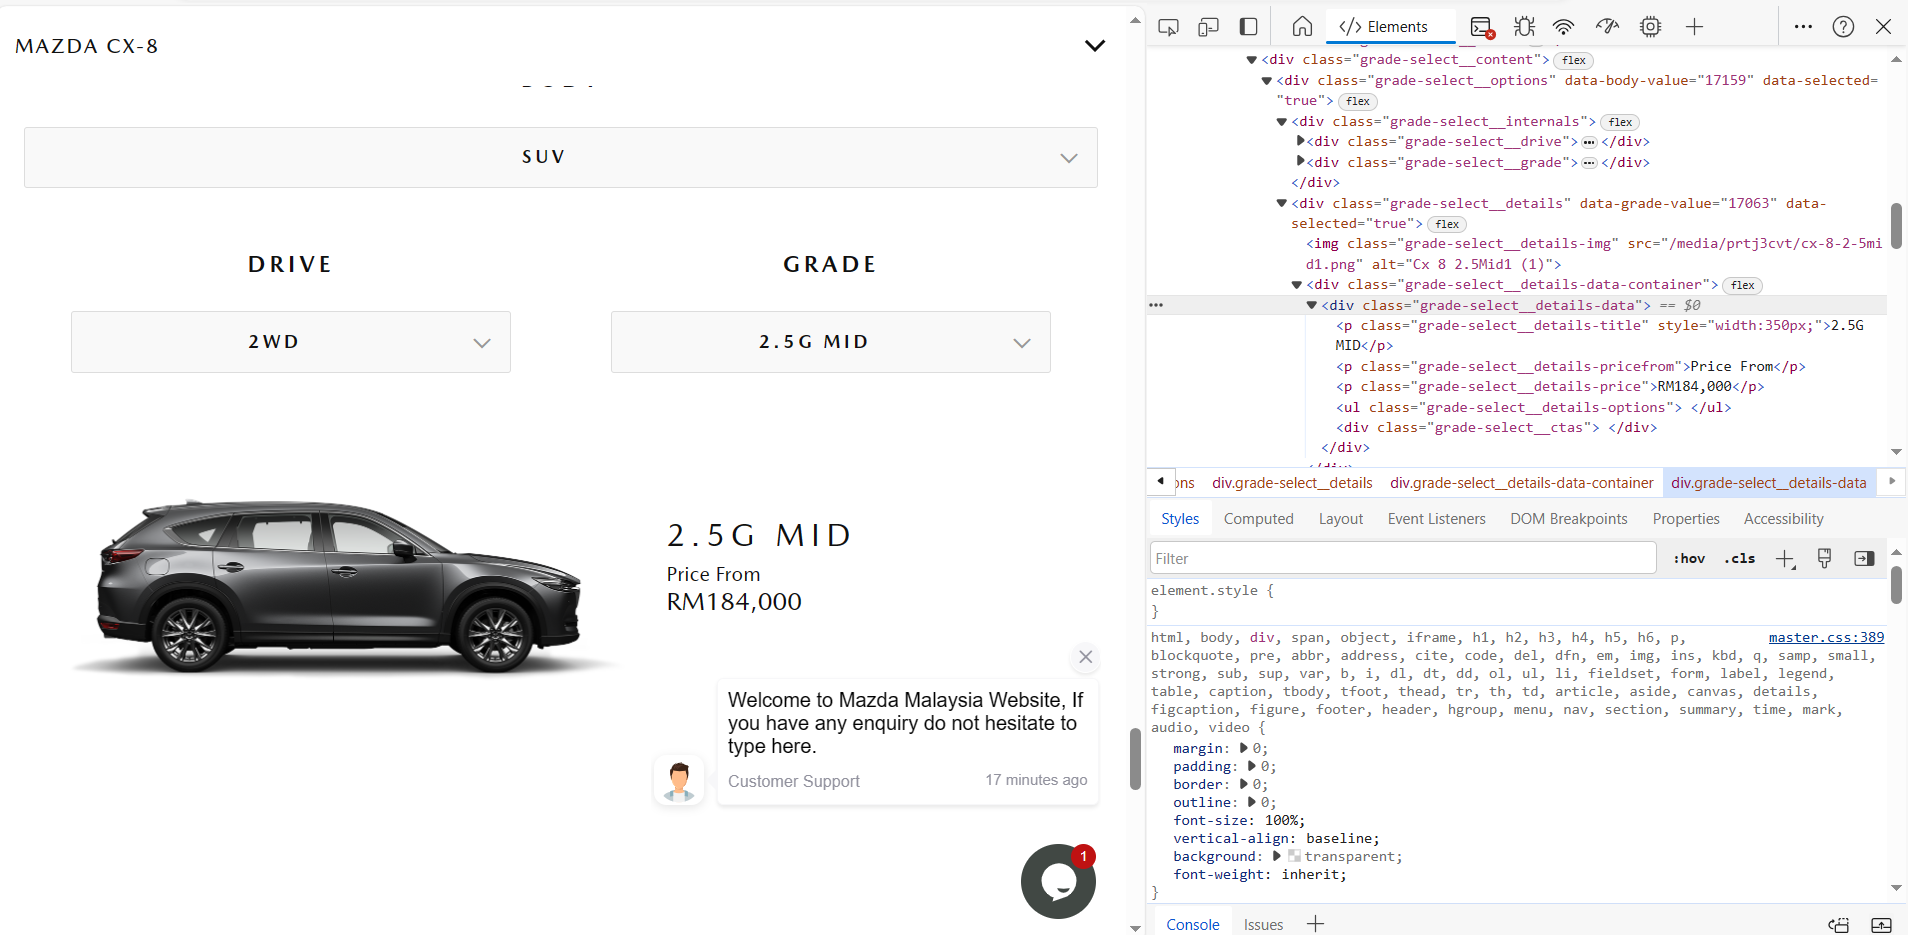

In [31]:
from PIL import Image
im1 = Image.open("C:/Users/user/OneDrive/Desktop/Sem 5 Slide/Data Mining/Mazda CX-8.png")
display(im1)

### Question 4

#### Step 1: Import the nltk library and read the SMSSpamHam.txt dataset.

In [32]:
import nltk
messages = [line.rstrip() for line in open('SMSSpamHam.txt')]
messages

['label\tmessage',
 "ham\tU don't know how stubborn I am. I didn't even want to go to the hospital. I kept telling Mark I'm not a weak sucker. Hospitals are for weak suckers.",
 'ham\tWhat you thinked about me. First time you saw me in class.',
 'ham\tA gram usually runs like  &lt;#&gt; , a half eighth is smarter though and gets you almost a whole second gram for  &lt;#&gt;',
 "ham\tK fyi x has a ride early tomorrow morning but he's crashing at our place tonight",
 'ham\tWow. I never realized that you were so embarassed by your accomodations. I thought you liked it, since i was doing the best i could and you always seemed so happy about "the cave". I\'m sorry I didn\'t and don\'t have more to give. I\'m sorry i offered. I\'m sorry your room was so embarassing.',
 'spam\tSMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV',
 'ham\tDo you know what Mallika Sherawat did yesterday? Find out now @  &lt;URL&gt;',
 'spam\tCo

#### Step 2: Print the length of the dataset and get the information.

In [33]:
print(len(messages))

3623


In [34]:
messages[5]

'ham\tWow. I never realized that you were so embarassed by your accomodations. I thought you liked it, since i was doing the best i could and you always seemed so happy about "the cave". I\'m sorry I didn\'t and don\'t have more to give. I\'m sorry i offered. I\'m sorry your room was so embarassing.'

#### Step 3: For Exploratory Data Analysis (EDA), describe the group for ham and spam ‘label’. Check the text length from the messages for the first five rows. Describe the details  regarding the dataset

In [35]:
for mess_no,message in enumerate(messages[:15]):
 print(mess_no, message)
 print('\n') #print the new line


0 label	message


1 ham	U don't know how stubborn I am. I didn't even want to go to the hospital. I kept telling Mark I'm not a weak sucker. Hospitals are for weak suckers.


2 ham	What you thinked about me. First time you saw me in class.


3 ham	A gram usually runs like  &lt;#&gt; , a half eighth is smarter though and gets you almost a whole second gram for  &lt;#&gt;


4 ham	K fyi x has a ride early tomorrow morning but he's crashing at our place tonight


5 ham	Wow. I never realized that you were so embarassed by your accomodations. I thought you liked it, since i was doing the best i could and you always seemed so happy about "the cave". I'm sorry I didn't and don't have more to give. I'm sorry i offered. I'm sorry your room was so embarassing.


6 spam	SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV


7 ham	Do you know what Mallika Sherawat did yesterday? Find out now @  &lt;URL&gt;


8 spam	Congrats! 1 year

#### Step 4: Visualize the text length using the histogram.

In [36]:
import pandas as pd
messages = pd.read_csv('SMSSpamHam.txt', sep='\t',
 names=['label', 'Messages'])

In [37]:
messages


,label,Messages
0,label,message
1,ham,U don't know how stubborn I am. I didn't even ...
2,ham,What you thinked about me. First time you saw ...
3,ham,"A gram usually runs like &lt;#&gt; , a half e..."
4,ham,K fyi x has a ride early tomorrow morning but ...
...,...,...
3616,spam,This is the 2nd time we have tried 2 contact u...
3617,ham,Will ü b going to esplanade fr home?
3618,ham,"Pity, * was in mood for that. So...any other s..."
3619,ham,The guy did some bitching but I acted like i'd...


In [39]:
messages.describe()

,label,Messages
count,3621,3621
unique,3,3428
top,ham,"Sorry, I'll call later"
freq,3133,23


In [40]:
messages.groupby('label').describe()

Messages                                                               
         count unique                                                top freq
label                                                                        
ham       3133   2975                             Sorry, I'll call later   23
label        1      1                                            message    1
spam       487    452  Today's Offer! Claim ur £150 worth of discount...    2

In [41]:
messages['length'] = messages['Messages'].apply(len)
messages.head(5)

,label,Messages,length
0,label,message,7
1,ham,U don't know how stubborn I am. I didn't even ...,148
2,ham,What you thinked about me. First time you saw ...,58
3,ham,"A gram usually runs like &lt;#&gt; , a half e...",124
4,ham,K fyi x has a ride early tomorrow morning but ...,80


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot: ylabel='Frequency'>

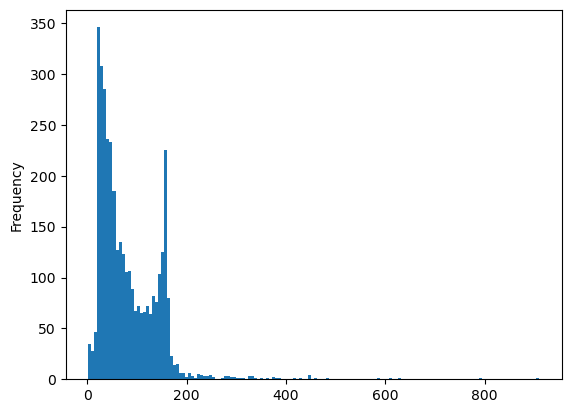

In [43]:
messages ['length'].plot.hist(bins=150)

<AxesSubplot: ylabel='Frequency'>

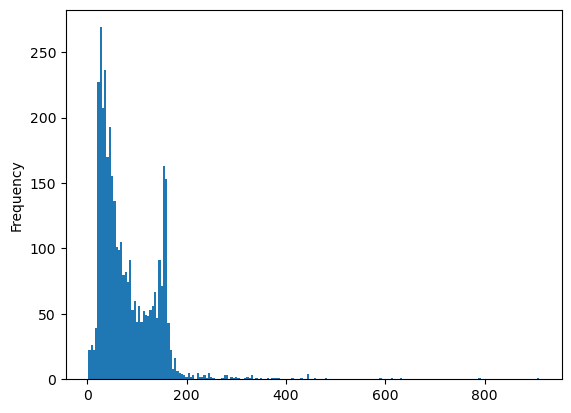

In [44]:
messages ['length'].plot.hist(bins=200)

#### Step 5: Get the maximum characters for the messages and print them.

In [45]:
messages['length'].describe()

count    3621.000000
mean       80.658105
std        61.219068
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [46]:
messages [messages['length'] == 910]

,label,Messages,length
1037,ham,For me the love should start with attraction.i...,910


In [47]:
messages [messages['length'] == 910]['Messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

#### Step 6: Visualize two histograms for ham and spam labels. Explain the results.

array([[<AxesSubplot: title={'center': 'length'}>]], dtype=object)

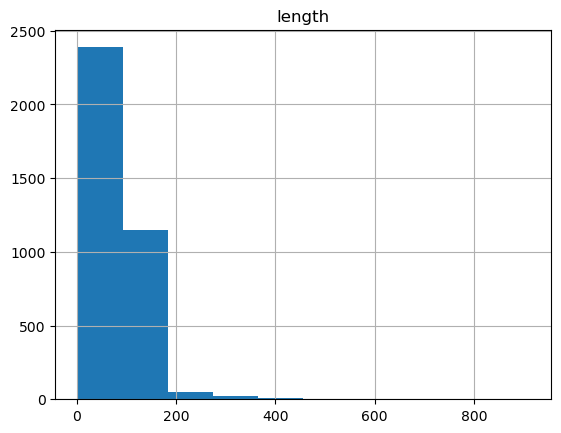

In [48]:
messages.hist()

array([[<AxesSubplot: title={'center': 'ham'}>,
        <AxesSubplot: title={'center': 'label'}>],
       [<AxesSubplot: title={'center': 'spam'}>, <AxesSubplot: >]],
      dtype=object)

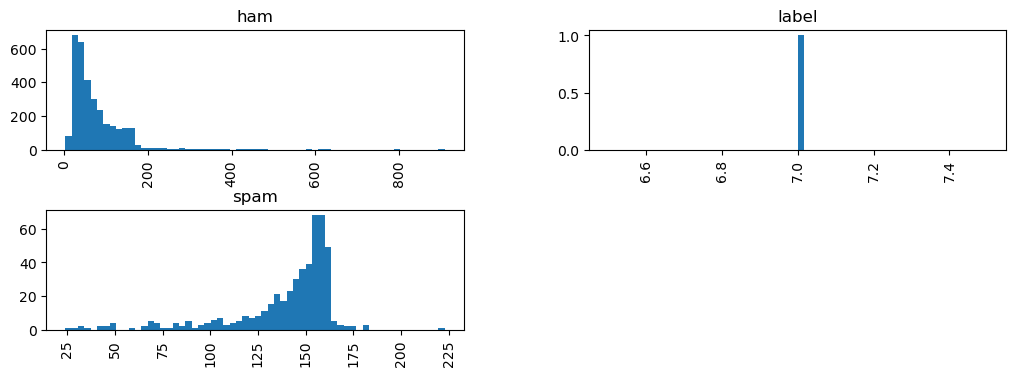

In [49]:
messages.hist(column='length', by='label', bins=60,figsize=(12,4))

Based on the histrogram, ham label shows that distribution is right skewed. Spam label shows that distribution is left skewed.